<br>

# 모폴로지 변형과 연산

In [1]:
# 필요한 모듈 불러오기
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

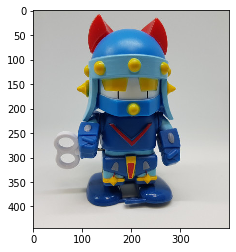

In [2]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')

# 이미지 출력하기
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.show()

### 기하학적 변환
- 이미지를 인위적으로 확대, 축소, 위치변경, 회전, 왜곡 하는 등 이미지의 형태를 변환하는 것이다.
- 픽셀 좌푯값의 위치를 재배치하는 과정
- 대표적으로 아핀변환(2x3행렬 사용), 원근변환(3x3행렬 사용)이 있다.
<br>

### 아핀변환
- 임의의 3개의 점을 매핑해서 기하학적 변환을 수행한다.
- 길이의 비와 평행성이 보존되는 법칙(사진 예시)
- 세 번째 행의 값은 0,0,1 값을 지닌다.
- getAffineTransform() 으로 아핀 맵 행렬 생성 한 후, warpAffine() 사용한다.
- getAffineTransform()은 변환 전 3개 좌표, 변환 후 3개 좌표(총 6개 좌표)가 필요하다.
- warpAffine()은 아핀 맵 행렬 적용 및 출력 이미지 설정을 하며, 보간법과 테두리 외삽법을 설정하는 파라미터가 있다.
<br>

### 원근변환
- 아핀행렬과 기본형은 유사하지만 수평성은 유지되지 않는다.
- 원근 왜곡을 요구하기 때문에 그만큼 더 많은 미지수(계산식에서)를 요구한다.

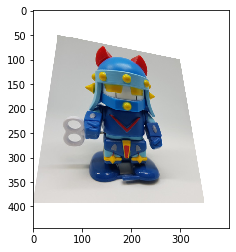

In [4]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg')
height, width, _ = src.shape

src_pts = np.array([[0.0, 0.0], [width, 0.0], [width, height], [0.0, height]], dtype=np.float32)
dst_pts = np.array([[50.0, 50.0], [300, 100.0], [width-50.0, height-50.0],
                    [0.0, height-50.0]], dtype=np.float32)

M = cv2.getPerspectiveTransform(src_pts, dst_pts)

dst = cv2.warpPerspective(src, M, (width, height), borderValue=(255,255,255,0))

# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 모폴로지 변환
- 영상이나 이미지를 형태학적 관점에서 접근하는 기법
- 기본적인 모폴로지 변환: 팽창 & 침식
- 이 기본 연산을 바탕으로 다양한 모폴로지 '연산'을 할 수 있다.
- 팽창: 커널 내부의 지역적 극댓값(local maximum)으로 대체
- 침식: 커널 내부의 지역적 극솟값(local minimum)으로 대체
- 커널(직사각형) 보다 더 복잡한 개념인 '구조요소'(직사각형, 타원, 십자가 등) 사용

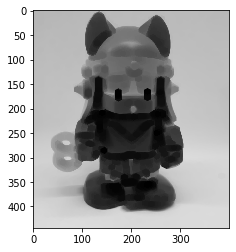

In [5]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg', cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5), anchor=(-1,-1))
dst = cv2.erode(src, kernel, iterations=3)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

### 모폴로지 연산
- 팽창과 침식을 기본연산으로, 고급 형태학을 적용하는 변환 연산
- 그레이스케일이나 다중 채널 이미지면 더 복잡한 연산이 필요한데, 이 때 모폴로지 연산이 좋다.
- 모폴로지 연산 메소드는 연산자(op)를 매개변수로 받는다. 이 것은 변환함수를 조합해서 수행하는 복합연산 방식을 말한다.
    - 열림 연산(Opening): 팽창+침식 연산자. 침식연산 적용 후 팽창연산을 수행한다.(스펙클이 사라지는 효과)
    - 닫힘 연산(Closing): 팽창+침식 연산자. 팽창연산 적용 후 침식연산을 수행한다.(홀이 사라지는 효과)
    - 그레디언트 연산: 팽창+침식 연산자. 팽창연산 - 침식 연산(두 연산을 감산). 이미지가 가장 급격하게 변하는 곳이서 가장 높은 결과를 반환.
    - 탑햇(TopHat): 입력이미지 - 열림연산(두 결과를 감산). 국소적으로 밝았던 부분이 분리된다.
    - 블랙햇(BlackHat): 닫힘연산 - 입력이미지(두 결과를 감산). 국소적으로 어두웠던 홀 들이 분리된다.
    - 히트미스(HitMiss): 주로 단일 채널 이미지, 이진화 이미지에서 사용하며 이미지의 전경이나 특정 패턴을 찾는데 사용.

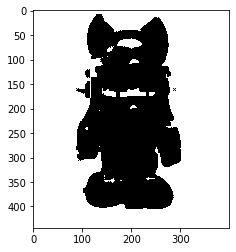

In [6]:
# 이미지 불러오기
src = cv2.imread('taekwonv1.jpg', cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)

kernel = np.array([[1,0,0,0,1],
                   [0,1,0,1,0],
                   [0,0,1,0,0],
                   [0,1,0,1,0],
                   [1,0,0,0,1]])
dst = cv2.morphologyEx(binary, cv2.MORPH_HITMISS, kernel, iterations=1)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()